In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import random

In [20]:
GRID_SIZE = 100
EMPTY_HOUSE_RATIO = 0.025
BLUE_PARTY_RATIO = .5
RED_PARTY_RATIO = 1-BLUE_PARTY_RATIO
#Any ratio of bad / total neighbors above this value results in an unhappy agent
RELOCATION_THRESHOLD = 0.25
EMPTY = 0
BLUE = 1
RED = 2

**Visualization Function**

In [21]:
def visualize(grid_in, title):
    colors = ['white', 'blue', 'red']
    cmap = ListedColormap(colors)

    print("Visualizing: \n")
    plt.figure(figsize=(8, 8))
    plt.imshow(grid_in, cmap=cmap, interpolation='nearest')

    plt.title(title)
    plt.show()

    print("Done.")

In [22]:
flat_grid = np.empty(GRID_SIZE*GRID_SIZE)
empty_error = -1.0
blue_error = -1.0
red_error = -1.0
empty_count = 0
blue_count = 0
red_count = 0
def fill_flat_grid(flat_grid,empty_count,blue_count,red_count,empty_error,blue_error,red_error):
    for i in range(len(flat_grid)):
        empty_error = EMPTY_HOUSE_RATIO*(GRID_SIZE*GRID_SIZE) - empty_count
        blue_error = (1-EMPTY_HOUSE_RATIO)*BLUE_PARTY_RATIO*(GRID_SIZE*GRID_SIZE) - blue_count
        red_error = (1-EMPTY_HOUSE_RATIO)*RED_PARTY_RATIO*(GRID_SIZE*GRID_SIZE) - red_count
        if empty_error > blue_error and empty_error > red_error:
            flat_grid[i] = EMPTY
            empty_count+=1
        elif blue_error > empty_error and blue_error > red_error:
            flat_grid[i] = BLUE
            blue_count+=1
        elif red_error > empty_error and red_error > blue_error:
            flat_grid[i] = RED
            red_count+=1
        #Tiebreakers
        elif blue_error == red_error or blue_error == empty_error:
            flat_grid[i] = BLUE
            blue_count+=1
        elif red_error == empty_error:
            flat_grid[i] = RED
            red_count+=1
        print(f"Decision:  {flat_grid[i]}, empty_error: {empty_error}, blue_error: {blue_error}, red_error: {red_error}")
        print("\n")
fill_flat_grid(flat_grid,empty_count,blue_count,red_count,empty_error,blue_error,red_error)


Decision:  1.0, empty_error: 250.0, blue_error: 4875.0, red_error: 4875.0


Decision:  2.0, empty_error: 250.0, blue_error: 4874.0, red_error: 4875.0


Decision:  1.0, empty_error: 250.0, blue_error: 4874.0, red_error: 4874.0


Decision:  2.0, empty_error: 250.0, blue_error: 4873.0, red_error: 4874.0


Decision:  1.0, empty_error: 250.0, blue_error: 4873.0, red_error: 4873.0


Decision:  2.0, empty_error: 250.0, blue_error: 4872.0, red_error: 4873.0


Decision:  1.0, empty_error: 250.0, blue_error: 4872.0, red_error: 4872.0


Decision:  2.0, empty_error: 250.0, blue_error: 4871.0, red_error: 4872.0


Decision:  1.0, empty_error: 250.0, blue_error: 4871.0, red_error: 4871.0


Decision:  2.0, empty_error: 250.0, blue_error: 4870.0, red_error: 4871.0


Decision:  1.0, empty_error: 250.0, blue_error: 4870.0, red_error: 4870.0


Decision:  2.0, empty_error: 250.0, blue_error: 4869.0, red_error: 4870.0


Decision:  1.0, empty_error: 250.0, blue_error: 4869.0, red_error: 4869.0


Decision:  2

Visualizing: 



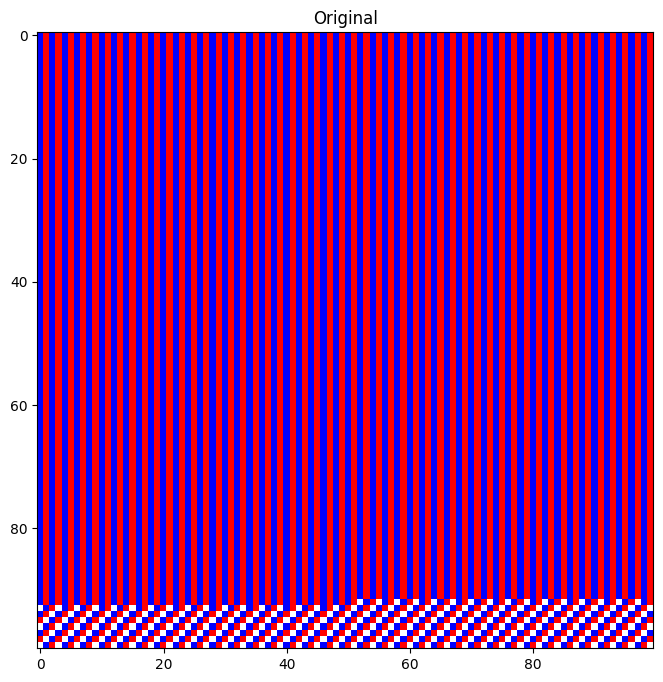

Done.


In [23]:
grid = flat_grid.reshape(GRID_SIZE,GRID_SIZE)
visualize(grid, "Original")

Starting simulation

Iteration: 1 There are 9750 unhappy agents and 250 empty spots

Iteration: 2 There are 8295 unhappy agents and 250 empty spots

Iteration: 3 There are 7765 unhappy agents and 250 empty spots

Iteration: 4 There are 7417 unhappy agents and 250 empty spots

Iteration: 5 There are 7092 unhappy agents and 250 empty spots

Iteration: 6 There are 6865 unhappy agents and 250 empty spots

Iteration: 7 There are 6589 unhappy agents and 250 empty spots

Iteration: 8 There are 6318 unhappy agents and 250 empty spots

Iteration: 9 There are 6077 unhappy agents and 250 empty spots

Iteration: 10 There are 5884 unhappy agents and 250 empty spots

Iteration: 11 There are 5636 unhappy agents and 250 empty spots

Iteration: 12 There are 5420 unhappy agents and 250 empty spots

Iteration: 13 There are 5130 unhappy agents and 250 empty spots

Iteration: 14 There are 4930 unhappy agents and 250 empty spots

Iteration: 15 There are 4779 unhappy agents and 250 empty spots

Iteration: 16

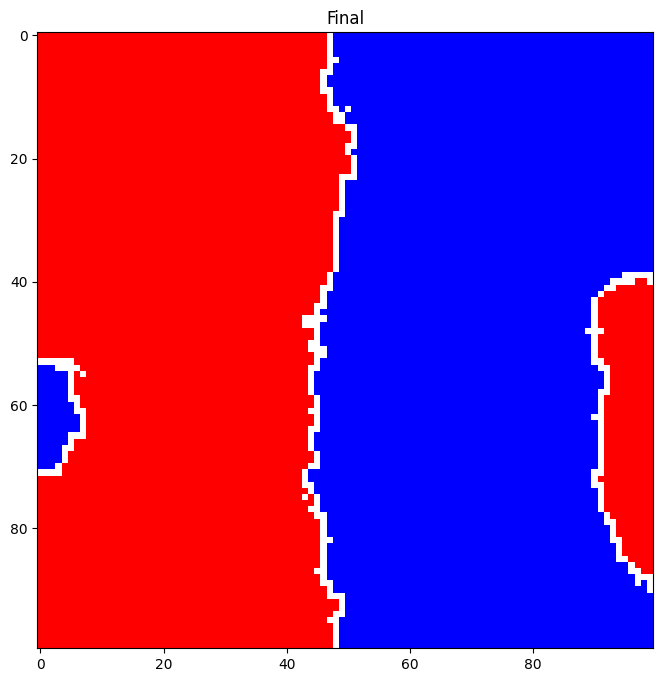

Done.


In [24]:
#identify unhappy agents and available indices
def identify(grid):
    unhappy_agents = []
    empty_spots = []
    for row in range(GRID_SIZE):
        for col in range(GRID_SIZE):
            #tally neighbors
            if grid[row][col] != EMPTY:
                total_neighbors = 0
                bad_neighbors = 0
                for neighbor_row in range(max(0, row-1), min(GRID_SIZE, row+2)):
                    for neighbor_col in range(max(0, col-1), min(GRID_SIZE, col+2)):
                        if(neighbor_row != row or neighbor_col != col):
                            if(grid[neighbor_row][neighbor_col] != grid[row][col] and grid[neighbor_row][neighbor_col] != EMPTY):
                                bad_neighbors+=1
                            if grid[neighbor_row][neighbor_col] != EMPTY:
                                total_neighbors+=1
                if(not total_neighbors or bad_neighbors / total_neighbors > RELOCATION_THRESHOLD):
                    unhappy_agents.append((row,col))
            else: 
                empty_spots.append((row,col))
    return unhappy_agents, empty_spots

def relocate(grid_in, unhappy_in, empty_in):
   for agent in unhappy_in:
       destination = random.choice(empty_in)
       destination_r, destination_c = destination
       agent_r, agent_c = agent
       grid_in[destination_r][destination_c] = grid_in[agent_r][agent_c]
       grid_in[agent_r][agent_c] = EMPTY
       empty_in.remove(destination)
       empty_in.append(agent)

continue_loop = True
count = 0
print("Starting simulation\n")
while continue_loop:
    count+=1
    unhappy, empty = identify(grid)
    if not unhappy:
        continue_loop = False
    else:
        print(f"Iteration: {count} There are {len(unhappy)} unhappy agents and {len(empty)} empty spots" + "\n")
        relocate(grid, unhappy, empty)
print(f"Simulation finished after {count} iterations" + "\n")

visualize(grid, "Final")